**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

Notes: Importing essential libraries for data analysis and visualization. Pandas for data manipulation, NumPy for numerical operations, Matplotlib for plotting, yfinance for fetching stock data, and datetime for date handling.

***Set Plot Style***

In [4]:
# Set plot style and figure size
plt.style.use('seaborn-v0_8-whitegrid')  # Updated from 'seaborn-whitegrid'
plt.rcParams['figure.figsize'] = (15, 8)

**Fetch Apple Stock Data**

In [6]:
# Fetch Apple stock data
start_date = '2010-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')
apple_data = yf.download('AAPL', start=start_date, end=end_date)

# Display the first few rows of data
print(f"Data shape: {apple_data.shape}")
apple_data.head()

[*********************100%***********************]  1 of 1 completed

Data shape: (3848, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
2010-01-05,6.451468,6.487882,6.417462,6.458089,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


**Downloading Apple stock data from 2010 to the current date using Yahoo Finance API. We then print the dataset's shape to see how many rows (days) and columns (features) we have, followed by displaying the first 5 rows to inspect the data format.**

**Check Data Quality**

In [8]:
# Check for missing values
print("\nMissing values in the dataset:")
print(apple_data.isnull().sum())


Missing values in the dataset:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


**Checking for missing values in our dataset. This is an important data quality step to ensure our analysis won't be affected by incomplete data.**

**Visualize Historical Stock Prices**

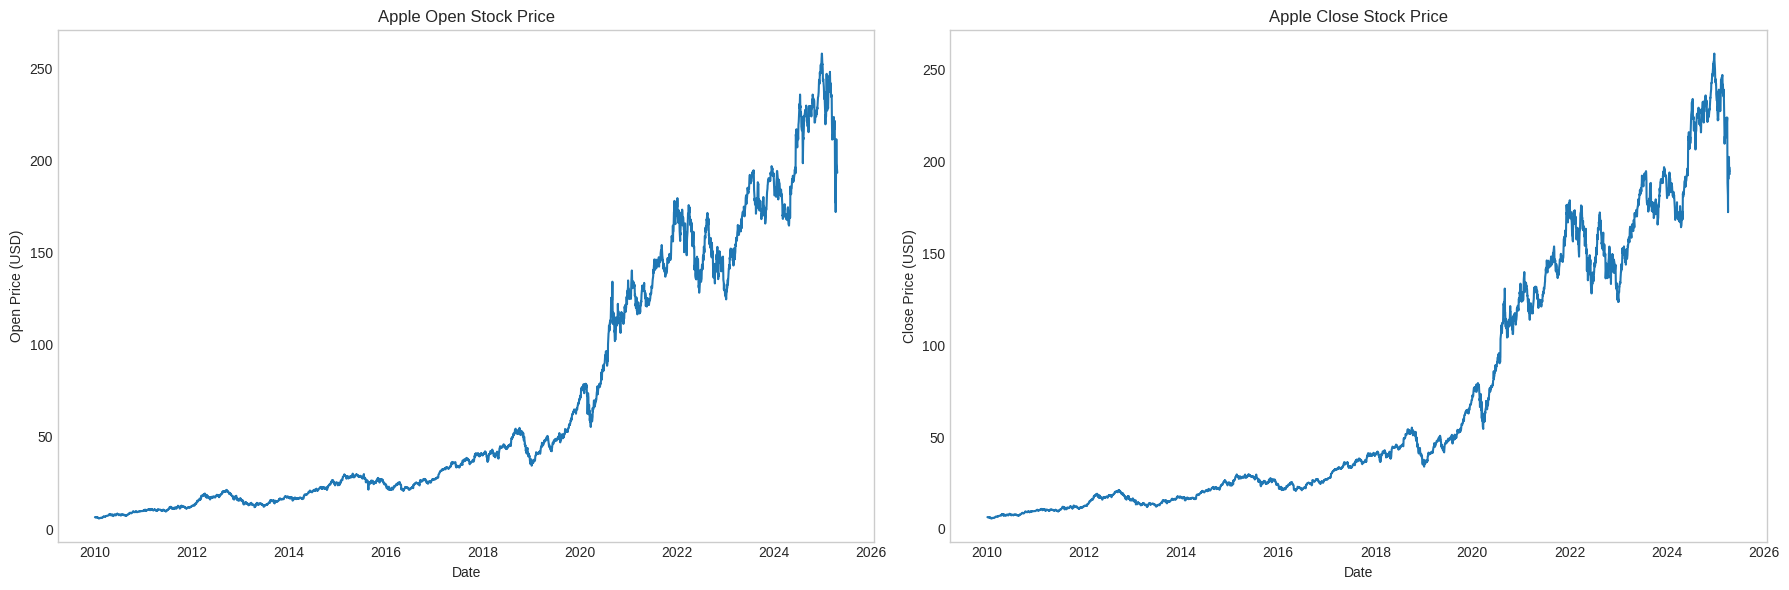

In [9]:
# Plot the full historical data
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(apple_data.index, apple_data['Open'])
plt.xlabel("Date")
plt.ylabel("Open Price (USD)")
plt.title("Apple Open Stock Price")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(apple_data.index, apple_data['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Apple Close Stock Price")
plt.grid()
plt.tight_layout()
plt.show()

**Creating a side-by-side visualization of Apple's opening and closing stock prices from 2010 to present. This gives us a long-term view of the stock's performance and patterns over more than a decade.**

**Filter Recent Data and Visualize**

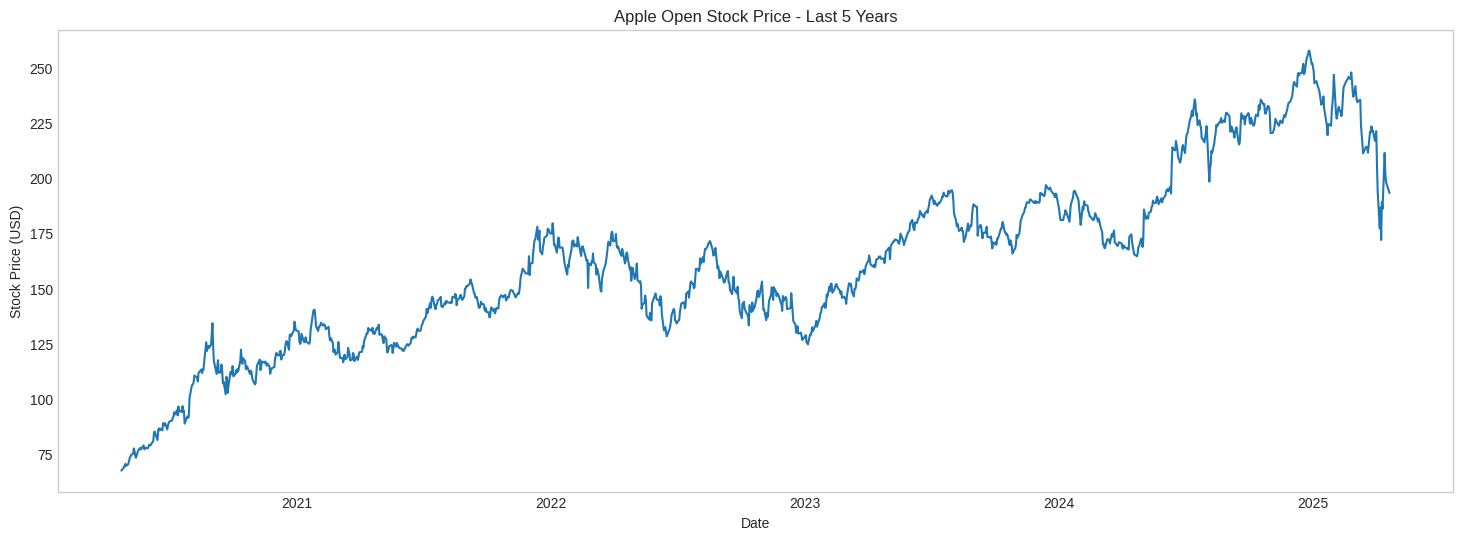

In [10]:
# Filter for the last 5 years of data
five_years_ago = datetime.now() - timedelta(days=5*365)
apple_5years = apple_data[apple_data.index >= five_years_ago]

# Plot the 5-year data
plt.figure(figsize=(18, 6))
plt.plot(apple_5years.index, apple_5years['Open'])
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Apple Open Stock Price - Last 5 Years")
plt.grid()
plt.show()

** Filtering the data to focus on just the last 5 years and visualizing the opening price trend for this more recent period. This gives us a closer look at Apple's recent performance, which might be more relevant for current investment decisions.**

**Save Processed Data**

In [11]:
# Save the filtered dataset to CSV
data_file_location = "../data/interim/"
data_file_name = "apple_stock_price_recent"
data_file_ext = "csv"

# Create directory if it doesn't exist
import os
os.makedirs(data_file_location, exist_ok=True)

# Store dataset
apple_5years.to_csv(data_file_location + data_file_name + "." + data_file_ext)
print(f"Data saved to {data_file_location + data_file_name + '.' + data_file_ext}")

Data saved to ../data/interim/apple_stock_price_recent.csv


Saving the filtered 5-year dataset to a CSV file for future use or additional analysis. We're using a project-based directory structure by saving to "../data/interim/" and creating the directory if it doesn't exist yet.